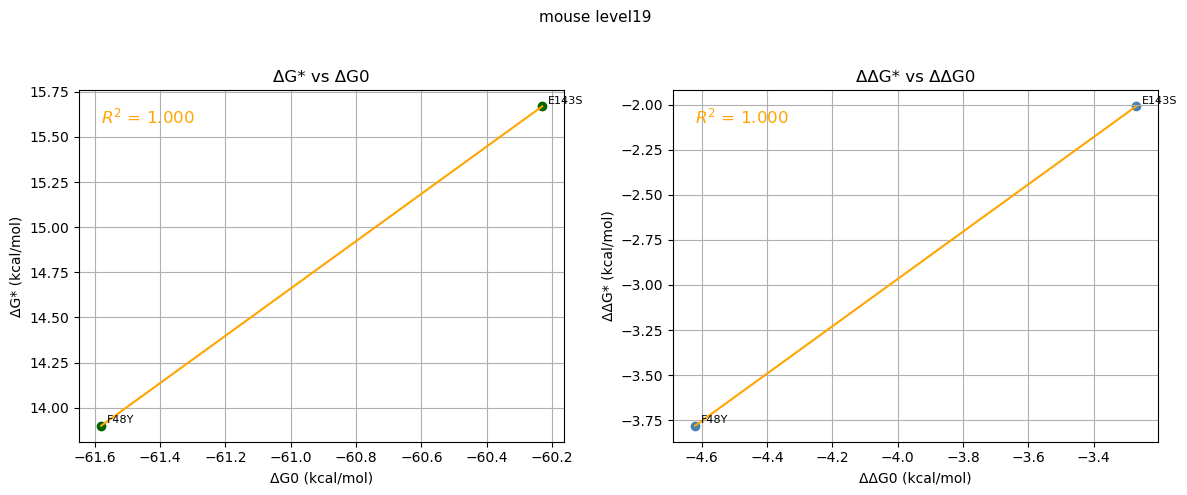

In [33]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# WT values
wt_dg_star = 17.68
wt_dg0 = -56.96

# Mutant data
mutants = [
    {"name": "F48Y",   "sec49_distance": 3.88,  "ca_distance": 4.60,  "dg_star": 13.90, "dg0": -61.58},
    {"name": "E143S",  "sec49_distance": 15.00, "ca_distance": 12.97, "dg_star": 15.67, "dg0": -60.23},
]


# Extract values
dg0 = [m["dg0"] for m in mutants]
dg_star = [m["dg_star"] for m in mutants]
labels = [m["name"] for m in mutants]

# ΔΔG and ΔΔG*
ddg = [dg - wt_dg0 for dg in dg0]
ddg_star = [dg - wt_dg_star for dg in dg_star]

plt.figure(figsize=(12, 5))

# Plot 1: ΔG* vs ΔG0 with fit line and R²
plt.subplot(1, 2, 1)
plt.scatter(dg0, dg_star, color='darkgreen')
slope, intercept, r_value, p_value, std_err = linregress(dg0, dg_star)
plt.plot(dg0, [slope*x + intercept for x in dg0], color='orange')
for i, label in enumerate(labels):
    plt.annotate(label, (dg0[i], dg_star[i]), fontsize=8, xytext=(4, 2), textcoords='offset points')
plt.xlabel("ΔG0 (kcal/mol)")
plt.ylabel("ΔG* (kcal/mol)")
plt.title("ΔG* vs ΔG0")
plt.grid(True)
plt.text(min(dg0), max(dg_star), f'$R^2$ = {r_value**2:.3f}', color='orange', fontsize=12, verticalalignment='top')

# Plot 2: ΔΔG* vs ΔΔG with fit line and R²
plt.subplot(1, 2, 2)
plt.scatter(ddg, ddg_star, color='steelblue')
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(ddg, ddg_star)
plt.plot(ddg, [slope2*x + intercept2 for x in ddg], color='orange')
for i, label in enumerate(labels):
    plt.annotate(label, (ddg[i], ddg_star[i]), fontsize=8, xytext=(4, 2), textcoords='offset points')
plt.xlabel("ΔΔG0 (kcal/mol)")
plt.ylabel("ΔΔG* (kcal/mol)")
plt.title("ΔΔG* vs ΔΔG0")
plt.grid(True)
plt.text(min(ddg), max(ddg_star), f'$R^2$ = {r_value2**2:.3f}', color='orange', fontsize=12, verticalalignment='top')

plt.suptitle("mouse level19", fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
save_path = "/home/hp/nayanika/github/GPX6/figures"
os.makedirs(save_path, exist_ok=True)
plt.savefig(f"{save_path}/level19mouse.png", dpi=300)

plt.show()
